In [84]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
data = pd.read_csv("datos_mice.csv", sep=";")

In [86]:
data

,Group,S25,S17
0,0,2530,690
1,0,174,143
2,0,2050,635
3,0,913,529
4,0,2000,790
...,...,...,...
58,2,999,467
59,2,870,120
60,2,1464,892
61,2,446,339


1056.7936507936508 502.78766254799973


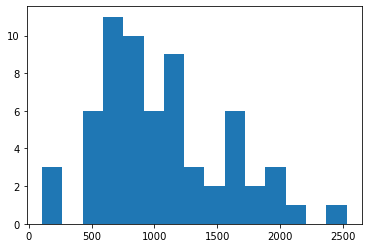

In [87]:
volumenes_tot = data["S25"]
promedio_tot, std_tot = np.mean(volumenes_tot), np.std(volumenes_tot)
print(promedio_tot, std_tot)
_ = plt.hist(volumenes_tot,bins=15)

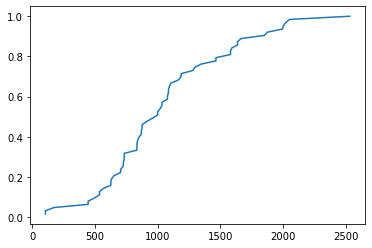

In [88]:
volumenes_tot_ord = np.sort(volumenes_tot)
cumulativa = np.linspace(1.0/len(volumenes_tot_ord), 1.0, len(volumenes_tot_ord))
plt.plot(volumenes_tot_ord, cumulativa)

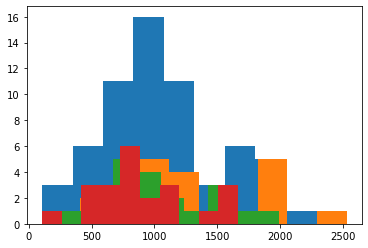

In [89]:
group = np.array(data["Group"])
ind_0, ind_1, ind_2  = group==0, group==1, group==2

volumenes_0, volumenes_1, volumenes_2  = volumenes_tot[ind_0], volumenes_tot[ind_1], volumenes_tot[ind_2]

_ = plt.hist(volumenes_tot)
_ = plt.hist(volumenes_0)
_ = plt.hist(volumenes_1)
_ = plt.hist(volumenes_2)


In [90]:
n_0, n_1, n_2 = np.count_nonzero(ind_0), np.count_nonzero(ind_1), np.count_nonzero(ind_2)
print(n_0, n_1, n_2)

20 21 22


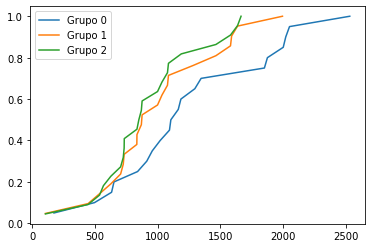

In [91]:
plt.plot(np.sort(volumenes_0), np.linspace(1.0/n_0, 1.0, n_0), label="Grupo 0")
plt.plot(np.sort(volumenes_1), np.linspace(1.0/n_1, 1.0, n_1), label="Grupo 1")
plt.plot(np.sort(volumenes_2), np.linspace(1.0/n_2, 1.0, n_2), label="Grupo 2")
plt.legend()

In [92]:
diff_mean_01 = np.mean(volumenes_0) - np.mean(volumenes_1)
diff_mean_02 = np.mean(volumenes_0) - np.mean(volumenes_2)
diff_mean_21 = np.mean(volumenes_1) - np.mean(volumenes_2)
print(diff_mean_01, diff_mean_02, diff_mean_21)

258.28571428571433 335.3636363636364 77.07792207792204


In [93]:
n_iteraciones = 20000
diffs_01, diffs_02, diffs_12 = np.zeros(n_iteraciones), np.zeros(n_iteraciones), np.zeros(n_iteraciones)
for i in range(n_iteraciones):
    np.random.shuffle(volumenes_tot)
    volumenes_0_fake = volumenes_tot[:n_0]
    volumenes_1_fake = volumenes_tot[n_0:n_0 + n_1]
    volumenes_2_fake = volumenes_tot[n_0 + n_1:]
    #print(np.mean(volumenes_tot), np.mean(volumenes_0_fake), np.mean(volumenes_1_fake), np.mean(volumenes_2_fake))
    diffs_01[i], diffs_02[i], diffs_12[i] = np.mean(volumenes_0_fake) - np.mean(volumenes_1_fake), np.mean(volumenes_0_fake) - np.mean(volumenes_2_fake), np.mean(volumenes_1_fake) - np.mean(volumenes_2_fake)

C:\Users\nandi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  exec(code_obj, self.user_global_ns, self.user_ns)


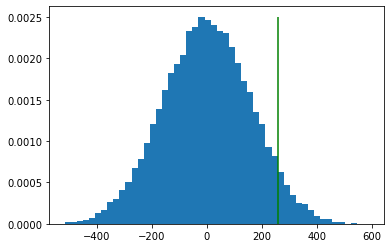

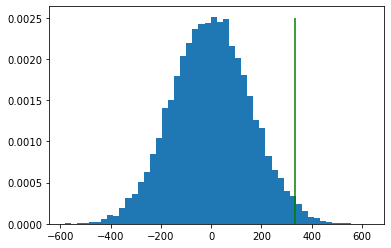

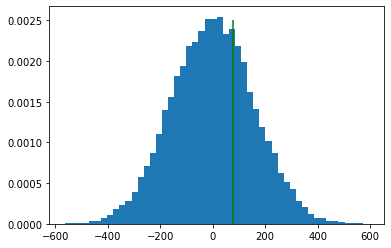

<Figure size 432x288 with 0 Axes>

In [94]:
_ = plt.hist(diffs_01, bins=50, density=True)
plt.vlines(diff_mean_01, 0, 0.0025, color="green")
plt.show()
plt.clf()
_ = plt.hist(diffs_02, bins=50, density=True)
plt.vlines(diff_mean_02, 0, 0.0025, color="green")
plt.show()
plt.clf()
_ = plt.hist(diffs_12, bins=50, density=True)
plt.vlines(diff_mean_21, 0, 0.0025, color="green")
plt.show()
plt.clf()

In [95]:
frac_altos_01 = np.count_nonzero(diffs_01 > diff_mean_01)/len(diffs_01)
frac_altos_02 = np.count_nonzero(diffs_02 > diff_mean_02)/len(diffs_02)
frac_altos_12 = np.count_nonzero(diffs_12 > diff_mean_21)/len(diffs_12)
print(frac_altos_01, frac_altos_02, frac_altos_12)

0.05135 0.0166 0.3119
